<h1 style="color:aqua; font-size:24px;">Problem Komiwojażera - projekt nr 2</h1>
<h1 style="color:yellow; font-size:30px;">Algorytm NN</h1>
<h1 style="color:white; font-size:24px;">Piotr Włostek</h1>
<h1 style="color:orange; font-size:24px;">259443</h1>


In [253]:
from collections import deque
import random
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
from operator import itemgetter

Kolejne litery alfabetu będą reprezentowały losowe wierzchołki o współrzędnych ze zbioru [-100,100] x [0,50] x [-100,100]


In [254]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [255]:
def full_graph(n):
    vertices = list(alphabet)[:n] 
    graph = {}
    for vertex in vertices:
        edges = [v for v in vertices if v != vertex]
        graph[vertex] = edges
    return graph

In [256]:

def generate_n_points_in_given_range(n, xRange = [-100, 100], yRange = [0, 50], zRange = [-100,100]):
    points = {}
    for i in range(n):
        x = random.randint(xRange[0], xRange[1])
        y = random.randint(yRange[0], yRange[1])
        z = random.randint(zRange[0], zRange[1])
        points[alphabet[i]] = [x,y,z]
    return points


Losujemy n wierzchołków


In [257]:
def generate_graph_with_n_coords(n):
    return [full_graph(n), generate_n_points_in_given_range(n)]


all = generate_graph_with_n_coords(11) # n = 11
graph, points = all

In [258]:
for point, coords in points.items():
   x, y, z = coords
   print(f"{point}: ({x}, {y}, {z})")

A: (-44, 12, -75)
B: (51, 42, 79)
C: (52, 3, 32)
D: (80, 42, 42)
E: (36, 25, -67)
F: (43, 5, 79)
G: (-94, 27, -78)
H: (75, 18, -9)
I: (-23, 25, 7)
J: (-42, 11, -19)
K: (77, 17, -4)


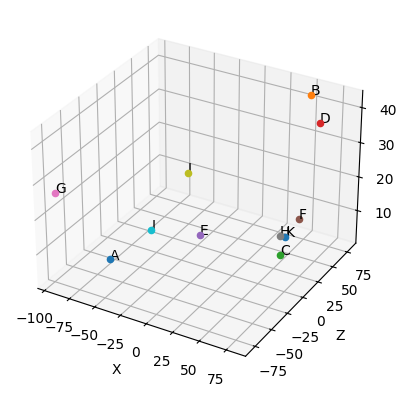

{'A': [-44, 12, -75],
 'B': [51, 42, 79],
 'C': [52, 3, 32],
 'D': [80, 42, 42],
 'E': [36, 25, -67],
 'F': [43, 5, 79],
 'G': [-94, 27, -78],
 'H': [75, 18, -9],
 'I': [-23, 25, 7],
 'J': [-42, 11, -19],
 'K': [77, 17, -4]}

In [259]:
def plot3D(points):
    labels = points.keys()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for point, label in zip(points.values(), labels):
        ax.scatter(point[0], point[2], point[1], label=label)
        ax.text(point[0], point[2], point[1], label)


    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    plt.show()

plot3D(points)
points

In [260]:
display(Markdown(r"Odległość dwóch punktów $A = (x_{1A}, x_{2A}, ..., x_{nA})$ oraz $ B = (x_{1B}, x_{2B}, ..., x_{nB})$ w przestrzeni $\mathbf{R}^n$ wyrażona jest wzorem"))
display(Markdown(r"$\mathbf{\rho}(\mathbf{A}, \mathbf{B}) = \sqrt{\sum\limits_{i=1}^{n}((x_{iA}-x_{iB})^2)}$"))


Odległość dwóch punktów $A = (x_{1A}, x_{2A}, ..., x_{nA})$ oraz $ B = (x_{1B}, x_{2B}, ..., x_{nB})$ w przestrzeni $\mathbf{R}^n$ wyrażona jest wzorem

$\mathbf{\rho}(\mathbf{A}, \mathbf{B}) = \sqrt{\sum\limits_{i=1}^{n}((x_{iA}-x_{iB})^2)}$

In [261]:
def distance(P,Q):
    return ((P[0]-Q[0])**2+(P[1]-Q[1])**2+(P[2]-Q[2])**2)**(1/2)

#przykład
print(distance(points["A"],points["C"]))

144.03471803700663


Odległości między wierzchołkami możemy przechowywać w słowniku krawędzi

In [262]:
def distances(points):
    distance_dict = {}
    for node1 in points.keys():
        for node2 in points.keys():
            if(node1 != node2):
                distance_dict[(node1,node2)] = distance(points[node1],points[node2])
    return distance_dict

distances_dict = distances(points)
distances_dict

{('A', 'B'): 183.41483037093812,
 ('A', 'C'): 144.03471803700663,
 ('A', 'D'): 173.1040149736568,
 ('A', 'E'): 81.44323176298937,
 ('A', 'F'): 177.01412373028316,
 ('A', 'G'): 52.28766584960549,
 ('A', 'H'): 136.20939761998804,
 ('A', 'I'): 85.63877626402656,
 ('A', 'J'): 56.04462507680822,
 ('A', 'K'): 140.3816227289028,
 ('B', 'A'): 183.41483037093812,
 ('B', 'C'): 61.08191221630181,
 ('B', 'D'): 47.01063709417264,
 ('B', 'E'): 147.74978849392645,
 ('B', 'F'): 37.8549864614954,
 ('B', 'G'): 214.24051904343398,
 ('B', 'H'): 94.31860898041276,
 ('B', 'I'): 104.63746938836012,
 ('B', 'J'): 138.6145735483827,
 ('B', 'K'): 90.49861877399013,
 ('C', 'A'): 144.03471803700663,
 ('C', 'B'): 61.08191221630181,
 ('C', 'D'): 49.040799340956916,
 ('C', 'E'): 102.66937225872184,
 ('C', 'F'): 47.89572005931219,
 ('C', 'G'): 184.3691948238642,
 ('C', 'H'): 49.34571916590131,
 ('C', 'I'): 82.06095295571457,
 ('C', 'J'): 107.24271537032247,
 ('C', 'K'): 46.010868281309364,
 ('D', 'A'): 173.10401497365

Funkcja sumująca odległość na całej ścieżce.

In [263]:
def get_path_length(path, dist_dict):
    d = 0
    for i in range(len(path)-1):
        node1 = path[i]
        node2 = path[i+1]
        d += dist_dict[(node1,node2)]
    return d
      

#przykład
samplePath = ["A", "D", "C", "B"]
print(samplePath, " ---> ", get_path_length(samplePath, distances_dict))



['A', 'D', 'C', 'B']  --->  283.2267265309155


In [264]:
def edges(dist_dict):
    graph = {}
    for edge in dist_dict:
        node1, node2 = edge
        if node1 not in graph:
            graph[node1] = [node2]
        else:
            graph[node1].append(node2)
    return graph

graph = edges(distances_dict)
graph

{'A': ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
 'B': ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
 'C': ['A', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
 'D': ['A', 'B', 'C', 'E', 'F', 'G', 'H', 'I', 'J', 'K'],
 'E': ['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K'],
 'F': ['A', 'B', 'C', 'D', 'E', 'G', 'H', 'I', 'J', 'K'],
 'G': ['A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'J', 'K'],
 'H': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'J', 'K'],
 'I': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K'],
 'J': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K'],
 'K': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']}

1. Algorytm zachłanny - znajdowanie ścieżki poszukując najbliższego (nieodwiedzonego) sąsiada.

In [265]:
def nearest_neighbour(graph, dist_dict, starter_node):
    node = starter_node
    path = []
    full_distance = 0
    while len(path) < len(graph):
        path.append(node)
        if(len(path) == len(graph)):
            break
        distance = float('inf')
        next_node = ''
        for neighbour in graph[node]:
            min_dist = dist_dict[(node, neighbour)]
            if neighbour not in path and min_dist < distance:
                distance = min_dist
                next_node = neighbour
        full_distance += distance
        print("nearest unvisited neighbour to", node, "-->", next_node, ". edge distance",
              "(",node,",", next_node,") = ", distance, ", full distance : ", full_distance)
        node = next_node
    dist_to_starter_node = dist_dict[(next_node, starter_node)]
    full_distance += dist_to_starter_node
    print("Going to the start point", "(",next_node,",", starter_node,") = ", dist_to_starter_node, ", full distance : ", full_distance)
    path.append(starter_node)
    return (path, full_distance)
            

NN = nearest_neighbour(graph,distances_dict, 'A')
NN


nearest unvisited neighbour to A --> G . edge distance ( A , G ) =  52.28766584960549 , full distance :  52.28766584960549
nearest unvisited neighbour to G --> J . edge distance ( G , J ) =  80.25584090893322 , full distance :  132.5435067585387
nearest unvisited neighbour to J --> I . edge distance ( J , I ) =  35.11409973215888 , full distance :  167.6576064906976
nearest unvisited neighbour to I --> C . edge distance ( I , C ) =  82.06095295571457 , full distance :  249.71855944641214
nearest unvisited neighbour to C --> K . edge distance ( C , K ) =  46.010868281309364 , full distance :  295.7294277277215
nearest unvisited neighbour to K --> H . edge distance ( K , H ) =  5.477225575051661 , full distance :  301.20665330277313
nearest unvisited neighbour to H --> D . edge distance ( H , D ) =  56.586217403180434 , full distance :  357.7928707059536
nearest unvisited neighbour to D --> B . edge distance ( D , B ) =  47.01063709417264 , full distance :  404.8035078001262
nearest unvi

(['A', 'G', 'J', 'I', 'C', 'K', 'H', 'D', 'B', 'F', 'E', 'A'],
 671.6313840598684)

In [266]:
def plot3D_path(path, pointsp, angle):
    labels = pointsp.keys()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(azim=angle)
    ax.set_title(f"Angle: {angle}")

    for point, label in zip(points.values(), labels):
        ax.scatter(point[0], point[2], point[1], label=label)
        ax.text(point[0], point[2], point[1], label)

    ax.set_xlabel('X')
    ax.set_ylabel('Z')
    ax.set_zlabel('Y')

    for i in range(len(path) - 1):
        point1 = path[i]
        point2 = path[i + 1]
        ax.plot([points[point1][0], points[point2][0]],
                [points[point1][2], points[point2][2]],
                [points[point1][1], points[point2][1]])
    plt.show()


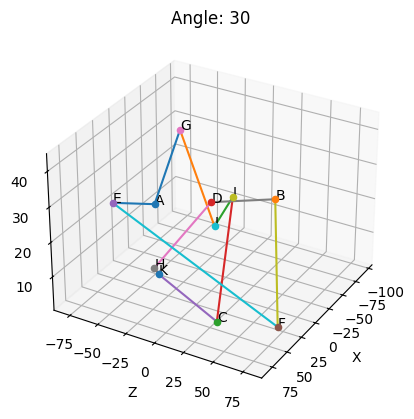

In [267]:
plot3D_path(NN[0], points, 30)

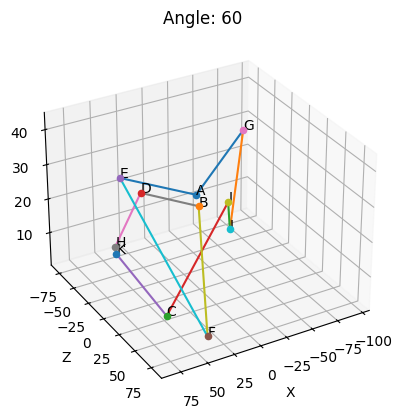

In [268]:
plot3D_path(NN[0], points, 60)

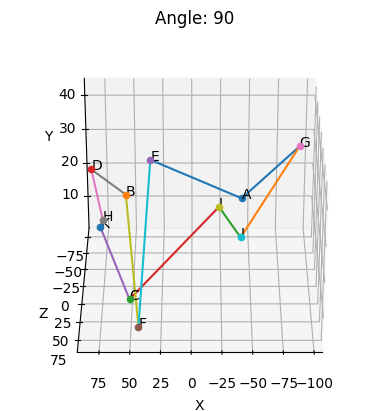

In [269]:
plot3D_path(NN[0], points, 90)

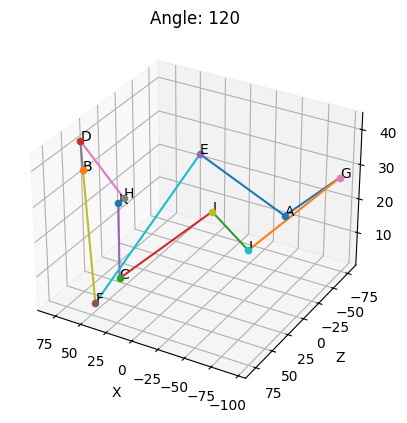

In [270]:
plot3D_path(NN[0], points, 120)

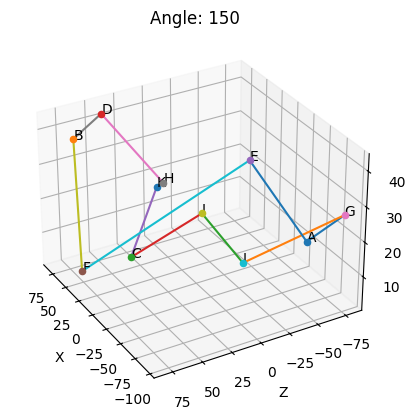

In [271]:
plot3D_path(NN[0], points, 150)